In [62]:
import tensorflow as tf
import tensorflow_io as tfio

In [90]:
audio = tfio.audio.AudioIOTensor('/home/alien/Git/DATA/ml-stuttering-events-dataset/CLIP_DIR/HeStutters/1/HeStutters_1_6.wav')

print(audio)

<AudioIOTensor: shape=[48000     1], dtype=<dtype: 'int16'>, rate=16000>


In [91]:
audio_s = audio[:]
audio_tensor = tf.squeeze(audio_s, axis=-1)

print(audio_tensor)
print(audio_tensor.shape)

tf.Tensor([-5 -3 -2 ...  1  6  1], shape=(48000,), dtype=int16)
(48000,)


In [92]:
from IPython.display import Audio

Audio(audio_tensor.numpy(), rate=audio.rate.numpy())

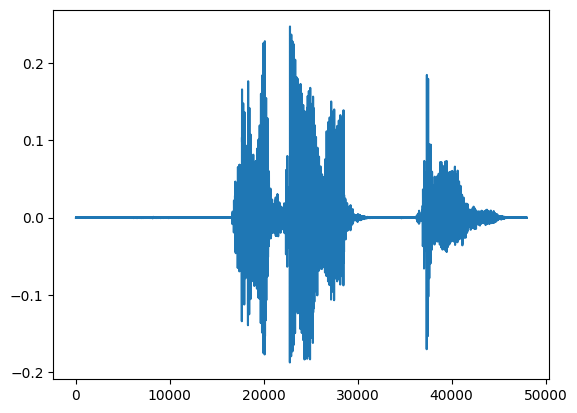

In [93]:
import matplotlib.pyplot as plt


tensor = tf.cast(audio_tensor, tf.float32) / 32768.0

plt.figure()
plt.plot(tensor.numpy())

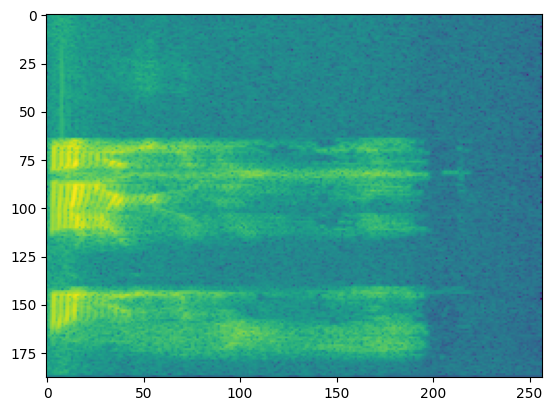

In [102]:
spectrogram = tfio.audio.spectrogram(
    tensor, nfft=512, window=512, stride=256)

plt.figure()
plt.imshow(tf.math.log(spectrogram).numpy())

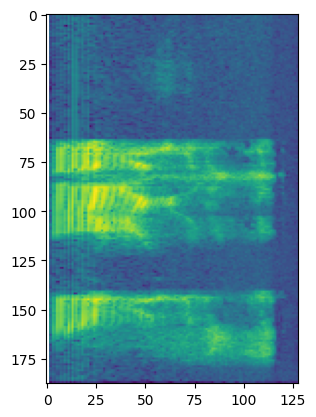

In [103]:
# Convert to mel-spectrogram
mel_spectrogram = tfio.audio.melscale(
    spectrogram, rate=16000, mels=128, fmin=0, fmax=8000)


plt.figure()
plt.imshow(tf.math.log(mel_spectrogram).numpy())

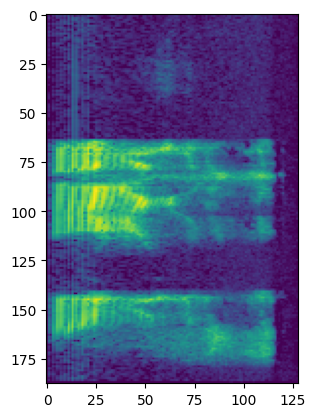

In [110]:
# Convert to db scale mel-spectrogram
dbscale_mel_spectrogram = tfio.audio.dbscale(
    mel_spectrogram, top_db=80)

plt.figure()
plt.imshow(dbscale_mel_spectrogram.numpy())

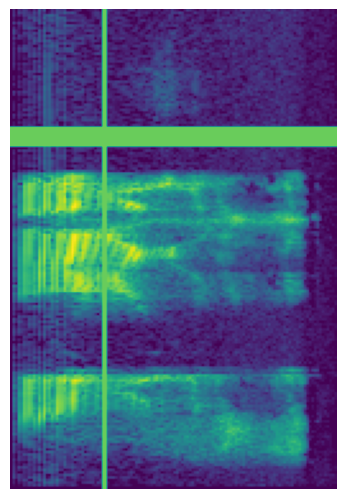

In [58]:
# Applying frequency masking
freq_mask = tfio.audio.freq_mask(dbscale_mel_spectrogram, param=10)

# Applying time masking
time_mask = tfio.audio.time_mask(freq_mask, param=10)

# Plotting the combined mask
plt.figure()
plt.imshow(time_mask.numpy())
plt.axis('off')  # Remove axes
plt.tight_layout(pad=0)  # Adjust layout to remove white border
plt.show()

In [59]:
def spec_augment(spectrogram, freq_masking_para=27, time_masking_para=70, freq_mask_num=2, time_mask_num=2):
    v = spectrogram.shape[0]
    tau = spectrogram.shape[1]
    augmented_spectrogram = spectrogram.copy()

    # Frequency masking
    for _ in range(freq_mask_num):
        f = np.random.randint(0, freq_masking_para)
        f0 = np.random.randint(0, v - f)
        augmented_spectrogram[f0:f0 + f, :] = 0

    # Time masking
    for _ in range(time_mask_num):
        t = np.random.randint(0, time_masking_para)
        t0 = np.random.randint(0, tau - t)
        augmented_spectrogram[:, t0:t0 + t] = 0

    return augmented_spectrogram

In [60]:
augmented_spectrogram = spec_augment(dbscale_mel_spectrogram)

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'copy'